In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from functools import reduce
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Function to Load the files with just columns
def load_column_file(path):
    df_column = pd.read_excel(path)
    return df_column

In [3]:
# Function load_column_file calls
sexbyage = load_column_file('/Users/saumyavora/Desktop/2019_1yr_Summary_FileTemplates/seq1.xlsx')
race = load_column_file('/Users/saumyavora/Desktop/2019_1yr_Summary_FileTemplates/seq3.xlsx')
Household_income = load_column_file('/Users/saumyavora/Desktop/2019_1yr_Summary_FileTemplates/seq77.xlsx')
Types_Health_insurance = load_column_file('/Users/saumyavora/Desktop/2019_1yr_Summary_FileTemplates/seq168.xlsx')

In [4]:
# To rename TXT file to CSV
def rename_txt_csv(original_txtfile, new_csvfile):
    os.rename(original_txtfile, new_csvfile)

In [5]:
# Function rename_txt_csv calls
# rename_txt_csv('/Users/saumyavora/Desktop/Upfront Healthcare take home/Illinois_All_Geographies /e20191il0001000.txt','/Users/saumyavora/Desktop/Upfront Healthcare take home/Illinois_All_Geographies /e20191il0001000.csv')
# rename_txt_csv('/Users/saumyavora/Desktop/Upfront Healthcare take home/Illinois_All_Geographies /e20191il0003000.txt','/Users/saumyavora/Desktop/Upfront Healthcare take home/Illinois_All_Geographies /e20191il0003000.csv')
# rename_txt_csv('/Users/saumyavora/Desktop/Upfront Healthcare take home/Illinois_All_Geographies /e20191il0077000.txt','/Users/saumyavora/Desktop/Upfront Healthcare take home/Illinois_All_Geographies /e20191il0077000.csv')
# rename_txt_csv('/Users/saumyavora/Desktop/Upfront Healthcare take home/Illinois_All_Geographies /e20191il0168000.txt','/Users/saumyavora/Desktop/Upfront Healthcare take home/Illinois_All_Geographies /e20191il0168000.csv')

In [6]:
# Function to load the data(CSV) files
def load_data_file(new_csvfile):
    df_data = pd.read_csv(new_csvfile,header=None)
    return df_data

In [7]:
# Function load_data_file calls
sexbyage_data = load_data_file('/Users/saumyavora/Desktop/Upfront Healthcare take home/Illinois_All_Geographies /e20191il0001000.csv')
race_data = load_data_file('/Users/saumyavora/Desktop/Upfront Healthcare take home/Illinois_All_Geographies /e20191il0003000.csv')
Household_income_data = load_data_file('/Users/saumyavora/Desktop/Upfront Healthcare take home/Illinois_All_Geographies /e20191il0077000.csv')
Types_Health_insurance_data = load_data_file('/Users/saumyavora/Desktop/Upfront Healthcare take home/Illinois_All_Geographies /e20191il0168000.csv')

In [8]:
# Set heading- Making the first row of the file to heading
def set_heading(df):
    new_header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    df.columns = new_header #set the header row as the df header
    df.reset_index(drop=True)
    return df

In [9]:
# Set heading Calls
sexbyage = set_heading(sexbyage)
race = set_heading(race)
Household_income = set_heading(Household_income)
Types_Health_insurance = set_heading(Types_Health_insurance)

In [10]:
# Function to change the name of the columns of the data file
def populate_df(df1,df2):
    df1_columns = df1.columns.to_list()
    df2.columns = df1_columns
    return df2

In [11]:
# Function populate_df calls
sexbyage_data = populate_df(sexbyage,sexbyage_data)
race_data = populate_df(race,race_data)
Household_income_data = populate_df(Household_income,Household_income_data)
Types_Health_insurance_data = populate_df(Types_Health_insurance,Types_Health_insurance_data)

In [12]:
# Illinois Geography Data
mini_geo = pd.read_excel('/Users/saumyavora/Desktop/Upfront Healthcare take home/1_year_Mini_Geo.xlsx',sheet_name='il')

In [13]:
mini_geo.rename(columns={'Logical Record Number': 'LOGRECNO'},inplace=True)
mini_geo.head()

State  LOGRECNO Geography ID  \
0    IL         1    04000US17   
1    IL         2    04001US17   
2    IL         3    04043US17   
3    IL         4    040A0US17   
4    IL         5    040C0US17   

                                      Geography Name  
0                                           Illinois  
1                                  Illinois -- Urban  
2                                  Illinois -- Rural  
3  Illinois -- In metropolitan or micropolitan st...  
4       Illinois -- In metropolitan statistical area

In [14]:
#Remove unnecessary columns from all the dataframes so we can merge the data frames easily
mini_geo = mini_geo.iloc[:,1:]
mini_geo.head()

LOGRECNO Geography ID                                     Geography Name
0         1    04000US17                                           Illinois
1         2    04001US17                                  Illinois -- Urban
2         3    04043US17                                  Illinois -- Rural
3         4    040A0US17  Illinois -- In metropolitan or micropolitan st...
4         5    040C0US17       Illinois -- In metropolitan statistical area

In [15]:
sexbyage_data.head()

FILEID  FILETYPE STUSAB  CHARITER  SEQUENCE  LOGRECNO  \
0  ACSSF   20190.0     il         0         1         1   
1  ACSSF   20190.0     il         0         1         2   
2  ACSSF   20190.0     il         0         1         3   
3  ACSSF   20190.0     il         0         1         4   
4  ACSSF   20190.0     il         0         1         5   

   SEX BY AGE% Total population%Total  SEX BY AGE%Total population%Total%Male  \
0                            12671821                                 6217305   
1                            11228181                                 5482674   
2                             1443640                                  734631   
3                            12068319                                 5912987   
4                            11245600                                 5500152   

   SEX BY AGE%Total population%Total%Male%Under 5 years  \
0                                             378778      
1                                             335337      
2                                              43441      
3                                             362079      
4                                             338178      

   SEX BY AGE%Total population%Total%Male%5 to 9 years  \
0                                             383859     
1                                             339614     
2                                              44245     
3                                             368165     
4                                             343517     

   SEX BY AGE%Total population%Total%Male%10 to 14 years  \
0                                             420715       
1                                             372442       
2                                              48273       
3                                             400530       
4                                             374832       

   SEX BY AGE%Total population%Total%Male%15 to 17 years  \
0                                             249124       
1                                             221507       
2                                              27617       
3                                             238495       
4                                             222458       

   SEX BY AGE%Total population%Total%Male%18 and 19 years  \
0                                             168973        
1                                             154332        
2                                              14641        
3                                             162933        
4                                             151909        

   SEX BY AGE%Total population%Total%Male%20 years  \
0                                            84744   
1                                            78077   
2                                             6667   
3                                            81919   
4                                            74553   

   SEX BY AGE%Total population%Total%Male%21 years  \
0                                            86507   
1                                            76950   
2                                             9557   
3                                            82893   
4                                            77230   

   SEX BY AGE%Total population%Total%Male%22 to 24 years  \
0                                             252191       
1                                             231407       
2                                              20784       
3                                             240463       
4                                             225245       

   SEX BY AGE%Total population%Total%Male%25 to 29 years  \
0                                             450372       
1                                             408796       
2                                              41576       
3                                             430294       
4                                             404780    

In [16]:
### Total Population
# First lets analyze population columns
population=sexbyage_data.iloc[:,6:]
population.head()

SEX BY AGE% Total population%Total  SEX BY AGE%Total population%Total%Male  \
0                            12671821                                 6217305   
1                            11228181                                 5482674   
2                             1443640                                  734631   
3                            12068319                                 5912987   
4                            11245600                                 5500152   

   SEX BY AGE%Total population%Total%Male%Under 5 years  \
0                                             378778      
1                                             335337      
2                                              43441      
3                                             362079      
4                                             338178      

   SEX BY AGE%Total population%Total%Male%5 to 9 years  \
0                                             383859     
1                                             339614     
2                                              44245     
3                                             368165     
4                                             343517     

   SEX BY AGE%Total population%Total%Male%10 to 14 years  \
0                                             420715       
1                                             372442       
2                                              48273       
3                                             400530       
4                                             374832       

   SEX BY AGE%Total population%Total%Male%15 to 17 years  \
0                                             249124       
1                                             221507       
2                                              27617       
3                                             238495       
4                                             222458       

   SEX BY AGE%Total population%Total%Male%18 and 19 years  \
0                                             168973        
1                                             154332        
2                                              14641        
3                                             162933        
4                                             151909        

   SEX BY AGE%Total population%Total%Male%20 years  \
0                                            84744   
1                                            78077   
2                                             6667   
3                                            81919   
4                                            74553   

   SEX BY AGE%Total population%Total%Male%21 years  \
0                                            86507   
1                                            76950   
2                                             9557   
3                                            82893   
4                                            77230   

   SEX BY AGE%Total population%Total%Male%22 to 24 years  \
0                                             252191       
1                                             231407       
2                                              20784       
3                                             240463       
4                                             225245       

   SEX BY AGE%Total population%Total%Male%25 to 29 years  \
0                                             450372       
1                                             408796       
2                                              41576       
3                                             430294       
4                                             404780       

   SEX BY AGE%Total population%Total%Male%30 to 34 years  \
0                                             432580       
1                                             391185       
2                                              41395       
3                                             414417       
4                                             38987

In [17]:
# Let's find the sum of all the columns 
sum_population=population.iloc[:,:].sum(axis=0).to_frame()
sum_population

0
SEX BY AGE% Total population%Total                  123448889.0
SEX BY AGE%Total population%Total%Male               60493203.0
SEX BY AGE%Total population%Total%Male%Under 5 ...    3715097.0
SEX BY AGE%Total population%Total%Male%5 to 9 y...    3744135.0
SEX BY AGE%Total population%Total%Male%10 to 14...    4078332.0
SEX BY AGE%Total population%Total%Male%15 to 17...    2410438.0
SEX BY AGE%Total population%Total%Male%18 and 1...    1655198.0
SEX BY AGE%Total population%Total%Male%20 years        826233.0
SEX BY AGE%Total population%Total%Male%21 years        828501.0
SEX BY AGE%Total population%Total%Male%22 to 24...    2484338.0
SEX BY AGE%Total population%Total%Male%25 to 29...    4506415.0
SEX BY AGE%Total population%Total%Male%30 to 34...    4344584.0
SEX BY AGE%Total population%Total%Male%35 to 39...    4233400.0
SEX BY AGE%Total population%Total%Male%40 to 44...    3836042.0
SEX BY AGE%Total population%Total%Male%45 to 49...    3859562.0
SEX BY AGE%Total population%Total%Male%50 to 54...    3809378.0
SEX BY AGE%Total population%Total%Male%55 to 59...    3914708.0
SEX BY AGE%Total population%Total%Male%60 and 6...    1535347.0
SEX BY AGE%Total population%Total%Male%62 to 64...    2226489.0
SEX BY AGE%Total population%Total%Male%65 and 6...    1290159.0
SEX BY AGE%Total population%Total%Male%67 to 69...    1662616.0
SEX BY AGE%Total population%Total%Male%70 to 74...    2275802.0
SEX BY AGE%Total population%Total%Male%75 to 79...    1522937.0
SEX BY AGE%Total population%Total%Male%80 to 84...     921636.0
SEX BY AGE%Total population%Total%Male%85 years...     811856.0
SEX BY AGE%Total population%Total%Female             62955686.0
SEX BY AGE%Total population%Total%Female%Under ...    3568762.0
SEX BY AGE%Total population%Total%Female%5 to 9...    3571942.0
SEX BY AGE%Total population%Total%Female%10 to ...    3920030.0
SEX BY AGE%Total population%Total%Female%15 to ...    2380216.0
SEX BY AGE%Total population%Total%Female%18 and...    1595332.0
SEX BY AGE%Total population%Total%Female%20 years      809898.0
SEX BY AGE%Total population%Total%Female%21 years      775144.0
SEX BY AGE%Total population%Total%Female%22 to ...    2426364.0
SEX BY AGE%Total population%Total%Female%25 to ...    4483181.0
SEX BY AGE%Total population%Total%Female%30 to ...    4262467.0
SEX BY AGE%Total population%Total%Female%35 to ...    4125469.0
SEX BY AGE%Total population%Total%Female%40 to ...    3987449.0
SEX BY AGE%Total population%Total%Female%45 to ...    3971989.0
SEX BY AGE%Total population%Total%Female%50 to ...    3902437.0
SEX BY AGE%Total population%Total%Female%55 to ...    4144706.0
SEX BY AGE%Total population%Total%Female%60 and...    1718375.0
SEX BY AGE%Total population%Total%Female%62 to ...    2336625.0
SEX BY AGE%Total population%Total%Female%65 and...    1473537.0
SEX BY AGE%Total population%Total%Female%67 to ...    1956480.0
SEX BY AGE%Total population%Total%Female%70 to ...    2609848.0
SEX BY AGE%Total population%Total%Female%75 to ...    1976857.0
SEX BY AGE%Total population%Total%Female%80 to ...    1348751.0
SEX BY AGE%Total population%Total%Female%85 yea...    1609827.0
SEX BY AGE (WHITE ALONE)% People who are White ...   84938709.0
SEX BY AGE (WHITE ALONE)%People who are White a...   42022628.0
SEX BY AGE (WHITE ALONE)%People who are White a...    2369221.0
SEX BY AGE (WHITE ALONE)%People who are White a...    2367366.0
SEX BY AGE (WHITE ALONE)%People who are White a...    2608201.0
SEX BY AGE (WHITE ALONE)%People who are White a...    1534492.0
SEX BY AGE (WHITE ALONE)%People who are White a...    1025636.0
SEX BY AGE (WHITE ALONE)%People who are White a...    2680975.0
SEX BY AGE (WHITE ALONE)%People who are White a...    2939777.0
SEX BY AGE (WHITE ALONE)%People who are White a...    2939597.0
SEX BY AGE (WHITE ALONE)%People who are White a...    5533935.0
SEX BY AGE (WHITE ALONE)%People who are White a...    5407183.0
SEX BY AGE (WHITE ALONE)%People who are White a...    5822561.0
SEX BY AGE (WHITE ALONE)%Peopl

<B>SEX BY AGE% Total population%Total = 123448889 </B><br>
<B>SEX BY AGE% Total population%Total Male = 60493203 </B><br>
<B>SEX BY AGE% Total population%Total Female =62955686 </B><br>

The highest Male population which corresponds to Total Population of <b>Male 25 to 29 years = 4506415</b>

 The highest Female population which corresponds to
<b> Total Population of Female 25 to 29 years = 4483181

In [18]:
# We will just keep the most aggregated columns
sexbyage_data = sexbyage_data.iloc[:,[5,6,16,40]]
sexbyage_data.head()

LOGRECNO  SEX BY AGE% Total population%Total  \
0         1                            12671821   
1         2                            11228181   
2         3                             1443640   
3         4                            12068319   
4         5                            11245600   

   SEX BY AGE%Total population%Total%Male%25 to 29 years  \
0                                             450372       
1                                             408796       
2                                              41576       
3                                             430294       
4                                             404780       

   SEX BY AGE%Total population%Total%Female%25 to 29 years  
0                                             441242        
1                                             407192        
2                                              34050        
3                                             425150        
4                                             402128

In [19]:
race_data.head()

FILEID  FILETYPE STUSAB  CHARITER  SEQUENCE  LOGRECNO  \
0  ACSSF   20190.0     il         0         3         1   
1  ACSSF   20190.0     il         0         3         2   
2  ACSSF   20190.0     il         0         3         3   
3  ACSSF   20190.0     il         0         3         4   
4  ACSSF   20190.0     il         0         3         5   

   RACE% Total population%Total  RACE%Total population%Total%White alone  \
0                    12671821.0                                9044059.0   
1                    11228181.0                                7662605.0   
2                     1443640.0                                1381454.0   
3                    12068319.0                                8474729.0   
4                    11245600.0                                7720673.0   

   RACE%Total population%Total%Black or African American alone  \
0                                          1790212.0             
1                                          1766890.0             
2                                            23322.0             
3                                          1772477.0             
4                                          1737128.0             

   RACE%Total population%Total%American Indian and Alaska Native alone  \
0                                            32600.0                     
1                                            30355.0                     
2                                             2245.0                     
3                                            31799.0                     
4                                            30430.0                     

   RACE%Total population%Total%Asian alone  \
0                                 717992.0   
1                                 707551.0   
2                                  10441.0   
3                                 714507.0   
4                                 709122.0   

   RACE%Total population%Total%Native Hawaiian and Other Pacific Islander alone  \
0                                             4511.0                              
1                                             4059.0                              
2                                              452.0                              
3                                             4105.0                              
4                                             3942.0                              

   RACE%Total population%Total%Some other race alone  \
0                                           730514.0   
1                                           724067.0   
2                                             6447.0   
3                                           727459.0   
4                                           717379.0   

   RACE%Total population%Total%Two or more races  \
0                                       351933.0   
1                                       332654.0   
2                                        19279.0   
3                                       343243.0   
4                                       326926.0   

   RACE%Total population%Total%Two or more races%Two races including Some other race  \
0                                            60983.0                                   
1                                            59373.0                                   
2                                             1610.0                                   
3                                            60347.0                                   
4                                            59368.0                                   

   RACE%Total population%Total%Two or more races%Two races excluding Some other race and three or more races  \
0                                           290950.0                                                           
1                                           273281.0                                                           
2                                            17669.0     

In [20]:
### Total Population
# First lets analyze population columns
Race_population=race_data.iloc[:,6:]
Race_population.head()

RACE% Total population%Total  RACE%Total population%Total%White alone  \
0                    12671821.0                                9044059.0   
1                    11228181.0                                7662605.0   
2                     1443640.0                                1381454.0   
3                    12068319.0                                8474729.0   
4                    11245600.0                                7720673.0   

   RACE%Total population%Total%Black or African American alone  \
0                                          1790212.0             
1                                          1766890.0             
2                                            23322.0             
3                                          1772477.0             
4                                          1737128.0             

   RACE%Total population%Total%American Indian and Alaska Native alone  \
0                                            32600.0                     
1                                            30355.0                     
2                                             2245.0                     
3                                            31799.0                     
4                                            30430.0                     

   RACE%Total population%Total%Asian alone  \
0                                 717992.0   
1                                 707551.0   
2                                  10441.0   
3                                 714507.0   
4                                 709122.0   

   RACE%Total population%Total%Native Hawaiian and Other Pacific Islander alone  \
0                                             4511.0                              
1                                             4059.0                              
2                                              452.0                              
3                                             4105.0                              
4                                             3942.0                              

   RACE%Total population%Total%Some other race alone  \
0                                           730514.0   
1                                           724067.0   
2                                             6447.0   
3                                           727459.0   
4                                           717379.0   

   RACE%Total population%Total%Two or more races  \
0                                       351933.0   
1                                       332654.0   
2                                        19279.0   
3                                       343243.0   
4                                       326926.0   

   RACE%Total population%Total%Two or more races%Two races including Some other race  \
0                                            60983.0                                   
1                                            59373.0                                   
2                                             1610.0                                   
3                                            60347.0                                   
4                                            59368.0                                   

   RACE%Total population%Total%Two or more races%Two races excluding Some other race and three or more races  \
0                                           290950.0                                                           
1                                           273281.0                                                           
2                                            17669.0                                                           
3                                           282896.0                                                           
4                                           267558.0                                                           

   DETAILED RACE% Total population%Total  \
0                               

In [21]:
# Let's find the sum of all the columns 
sum_Race_population=Race_population.iloc[:,:].sum(axis=0).to_frame()
sum_Race_population

0
RACE% Total population%Total                        122667881.0
RACE%Total population%Total%White alone              84581314.0
RACE%Total population%Total%Black or African Am...   18881366.0
RACE%Total population%Total%American Indian and...     328844.0
RACE%Total population%Total%Asian alone               7638538.0
RACE%Total population%Total%Native Hawaiian and...      45737.0
RACE%Total population%Total%Some other race alone     7674870.0
RACE%Total population%Total%Two or more races         3517212.0
RACE%Total population%Total%Two or more races%T...     636393.0
RACE%Total population%Total%Two or more races%T...    2880819.0
DETAILED RACE% Total population%Total                       0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population%Total%Population...          0.0
DETAILED RACE%Total population

<B>RACE% Total population%Total = 122667881 </B><br>
<B>RACE%Total population%Total%White alone = 84581314 </B><br>
<B>RACE%Total population%Total%Black or African American alone = 18881366 </B><br>

In [22]:
race_data = race_data.iloc[:,[5,6,7,8]]
race_data.head()

LOGRECNO  RACE% Total population%Total  \
0         1                    12671821.0   
1         2                    11228181.0   
2         3                     1443640.0   
3         4                    12068319.0   
4         5                    11245600.0   

   RACE%Total population%Total%White alone  \
0                                9044059.0   
1                                7662605.0   
2                                1381454.0   
3                                8474729.0   
4                                7720673.0   

   RACE%Total population%Total%Black or African American alone  
0                                          1790212.0            
1                                          1766890.0            
2                                            23322.0            
3                                          1772477.0            
4                                          1737128.0

In [23]:
Household_income_data.head()

FILEID  FILETYPE STUSAB  CHARITER  SEQUENCE  LOGRECNO  \
0  ACSSF   20190.0     il         0        77         1   
1  ACSSF   20190.0     il         0        77         2   
2  ACSSF   20190.0     il         0        77         3   
3  ACSSF   20190.0     il         0        77         4   
4  ACSSF   20190.0     il         0        77         5   

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)% Households%Total  \
0                                            4866006                                               
1                                            4295419                                               
2                                             570587                                               
3                                            4612707                                               
4                                            4275748                                               

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%Less than $10 000  \
0                                             289515                                                                
1                                             266590                                                                
2                                              22925                                                                
3                                             274297                                                                
4                                             251772                                                                

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$10 000 to $14 999  \
0                                             178230                                                                 
1                                             159682                                                                 
2                                              18548                                                                 
3                                             165441                                                                 
4                                             148829                                                                 

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$15 000 to $19 999  \
0                                             183540                                                                 
1                                             162123                                                                 
2                                              21417                                                                 
3                                             169213                                                                 
4                                             151624                                                                 

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$20 000 to $24 999  \
0                                             206595                                                                 
1                                             184033                                                                 
2                                              22562                                                                 
3                                             193472                                                                 
4                                             175063                                                                 

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$25 000 to $29 999  \
0                                             189948                                              

In [24]:
### Total Population
# First lets analyze population columns
Household_income_population=Household_income_data.iloc[:,6:]
Household_income_population.head()

HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)% Households%Total  \
0                                            4866006                                               
1                                            4295419                                               
2                                             570587                                               
3                                            4612707                                               
4                                            4275748                                               

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%Less than $10 000  \
0                                             289515                                                                
1                                             266590                                                                
2                                              22925                                                                
3                                             274297                                                                
4                                             251772                                                                

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$10 000 to $14 999  \
0                                             178230                                                                 
1                                             159682                                                                 
2                                              18548                                                                 
3                                             165441                                                                 
4                                             148829                                                                 

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$15 000 to $19 999  \
0                                             183540                                                                 
1                                             162123                                                                 
2                                              21417                                                                 
3                                             169213                                                                 
4                                             151624                                                                 

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$20 000 to $24 999  \
0                                             206595                                                                 
1                                             184033                                                                 
2                                              22562                                                                 
3                                             193472                                                                 
4                                             175063                                                                 

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$25 000 to $29 999  \
0                                             189948                                                                 
1                                             168761                                                                 
2                                              21187                                                                 
3                                             177291                                                

In [25]:
# Let's find the sum of all the columns 
sum_Household_income_population = Household_income_population.iloc[:,:].sum(axis=0).to_frame()
sum_Household_income_population

0
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                           47348509
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            2910239
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            1755812
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            1762183
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            2010915
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            1845081
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            1921351
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            1782334
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            1893582
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            1628790
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            3259395
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            4482986
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            6000469
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            4694213
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            3260343
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            3738452
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                            4402364
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        3.43235e+07
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                         1.5037e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        1.00141e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        1.14843e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                         1.3067e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                         1.2199e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        1.28461e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        1.25802e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        1.34458e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        1.17544e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        2.31992e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                         3.3615e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        4.55184e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        3.62213e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        2.56591e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        3.02249e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        3.63689e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                         7.0098e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                        1.01557e+06
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                             567745
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                             437698
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019...                                             455782
HOUSEHOLD INCOME IN 

<b>HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)% Households%Total = 47348509 </b>

In [26]:
Household_income_data = Household_income_data.iloc[:,[5,6,17,18,19,20,21,22]]
Household_income_data.head()

LOGRECNO  \
0         1   
1         2   
2         3   
3         4   
4         5   

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)% Households%Total  \
0                                            4866006                                               
1                                            4295419                                               
2                                             570587                                               
3                                            4612707                                               
4                                            4275748                                               

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$60 000 to $74 999  \
0                                             465073                                                                 
1                                             400235                                                                 
2                                              64838                                                                 
3                                             435885                                                                 
4                                             400621                                                                 

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$75 000 to $99 999  \
0                                             622878                                                                 
1                                             537819                                                                 
2                                              85059                                                                 
3                                             589651                                                                 
4                                             543727                                                                 

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$100 000 to $124 999  \
0                                             485409                                                                   
1                                             422468                                                                   
2                                              62941                                                                   
3                                             462372                                                                   
4                                             434748                                                                   

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$125 000 to $149 999  \
0                                             335706                                                                   
1                                             297249                                                                   
2                                              38457                                                                   
3                                             324448                                                                   
4                                             308048                                                                   

   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$150 000 to $199 999  \
0                                             379693                                                                   
1                                             339423                                                                   
2                                              40270                                       

In [27]:
Types_Health_insurance_data.head()

FILEID  FILETYPE STUSAB  CHARITER  SEQUENCE  LOGRECNO  \
0  ACSSF   20190.0     il         0       168         1   
1  ACSSF   20190.0     il         0       168         2   
2  ACSSF   20190.0     il         0       168         3   
3  ACSSF   20190.0     il         0       168         4   
4  ACSSF   20190.0     il         0       168         5   

   HEALTH INSURANCE COVERAGE STATUS BY AGE (TWO OR MORE RACES)% TWO OR MORE RACES CIVILIAN NONINSTITUTIONALIZED POPULATION%Total  \
0                                           349060.0                                                                               
1                                           329992.0                                                                               
2                                            19068.0                                                                               
3                                           340541.0                                                                               
4                                           324648.0                                                                               

   HEALTH INSURANCE COVERAGE STATUS BY AGE (TWO OR MORE RACES)%TWO OR MORE RACES CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%Under 6 years  \
0                                            62039.0                                                                                            
1                                            58400.0                                                                                            
2                                             3639.0                                                                                            
3                                            60375.0                                                                                            
4                                            56768.0                                                                                            

   HEALTH INSURANCE COVERAGE STATUS BY AGE (TWO OR MORE RACES)%TWO OR MORE RACES CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%Under 6 years%With health insurance coverage  \
0                                            60949.0                                                                                                                           
1                                            57340.0                                                                                                                           
2                                             3609.0                                                                                                                           
3                                            59285.0                                                                                                                           
4                                            55804.0                                                                                                                           

   HEALTH INSURANCE COVERAGE STATUS BY AGE (TWO OR MORE RACES)%TWO OR MORE RACES CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%Under 6 years%No health insurance coverage  \
0                                             1090.0                                                                                                                         
1                                             1060.0                                                                                                                         
2                                               30.0                                                                                                                         
3                                             1090.0                                                                                                                         
4                                              964.0    

In [28]:
### Total Population
# First lets analyze population columns
Types_Health_insurance_population=Types_Health_insurance_data.iloc[:,6:]
Types_Health_insurance_population.head()

HEALTH INSURANCE COVERAGE STATUS BY AGE (TWO OR MORE RACES)% TWO OR MORE RACES CIVILIAN NONINSTITUTIONALIZED POPULATION%Total  \
0                                           349060.0                                                                               
1                                           329992.0                                                                               
2                                            19068.0                                                                               
3                                           340541.0                                                                               
4                                           324648.0                                                                               

   HEALTH INSURANCE COVERAGE STATUS BY AGE (TWO OR MORE RACES)%TWO OR MORE RACES CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%Under 6 years  \
0                                            62039.0                                                                                            
1                                            58400.0                                                                                            
2                                             3639.0                                                                                            
3                                            60375.0                                                                                            
4                                            56768.0                                                                                            

   HEALTH INSURANCE COVERAGE STATUS BY AGE (TWO OR MORE RACES)%TWO OR MORE RACES CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%Under 6 years%With health insurance coverage  \
0                                            60949.0                                                                                                                           
1                                            57340.0                                                                                                                           
2                                             3609.0                                                                                                                           
3                                            59285.0                                                                                                                           
4                                            55804.0                                                                                                                           

   HEALTH INSURANCE COVERAGE STATUS BY AGE (TWO OR MORE RACES)%TWO OR MORE RACES CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%Under 6 years%No health insurance coverage  \
0                                             1090.0                                                                                                                         
1                                             1060.0                                                                                                                         
2                                               30.0                                                                                                                         
3                                             1090.0                                                                                                                         
4                                              964.0                                                                                                                         

   HEALTH INSURANCE COVERAGE STATUS BY AGE (TWO OR MORE RACES)%TWO OR MORE RACES CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%6 to 18 years  \
0                                           110356.0                                        

In [29]:
# Let's find the sum of all the columns 
sum_Types_Health_insurance_population = Types_Health_insurance_population.iloc[:,:].sum(axis=0).to_frame()
sum_Types_Health_insurance_population.columns = ['1']
sum_Types_Health_insurance_population.sort_values(by='1', ascending=False)

1
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...  121809415.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   83969175.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   69879316.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   69818047.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...   62413281.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...   59396134.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   50785295.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   46193161.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   42485394.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   39716636.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...   37553329.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...   36381267.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...   34036208.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...   31900026.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (HISPAN...   23100364.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (HISPAN...   22641920.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   18361685.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (BLACK ...   18213528.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   17680979.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   14822195.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...   14756807.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   14728475.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...   14251489.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...   14175031.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (HISPAN...   13837082.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   13727695.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   13666227.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...   13662257.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   13607252.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   13294292.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (BLACK ...   11024253.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...   10608463.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   10594737.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (HISPAN...   10564482.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...   10503516.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...   10070803.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (BLACK ...    9652924.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    9532841.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    9227827.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    9053144.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    8719009.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    8511850.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    8425075.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...    8258060.0
HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%...    8187351.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    8117311.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    7853367.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    7811301.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    7709484.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (HISPAN...    7701567.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (SOME O...    7396127.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (HISPAN...    7277791.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (ASIAN ...    7246144.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    5792026.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    5775181.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    5660030.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (HISPAN...    5337060.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ...    5277040.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (HISPAN...    5004818.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (ASIAN ...    4848097.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (BLACK ...    4700725.0
HEALTH INSURANCE COVERAGE STATUS BY AGE (SOME O...    4649952.0
HEALTH INSURANCE COVERAGE STAT

<b>HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE% Civilian noninstitutionalized population%Total= 121809415</b><br>
<b>HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE)% WHITE ALONE CIVILIAN NONINSTITUTIONALIZED POPULATION%Total=	83969175</b><br>
<b>HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)% WHITE ALONE, NOT HISPANIC OR LATINO CIVILIAN NONINSTITUTIONALIZED POPULATION%Total = 69879316 </b><br>
<b>HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%Civilian noninstitutionalized population%Total%Female	62413281</b><br>
<b>HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%Civilian noninstitutionalized population%Total%Male	59396134</b><br>
<b>HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE)%WHITE ALONE CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%19 to 64 years	50785295 </b><br>
<b>HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE)%WHITE ALONE CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%19 to 64 years%With health insurance coverage	46193161</b><br>




In [30]:
Types_Health_insurance_data = Types_Health_insurance_data[['LOGRECNO','HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE% Civilian noninstitutionalized population%Total','HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE)% WHITE ALONE CIVILIAN NONINSTITUTIONALIZED POPULATION%Total','HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)% WHITE ALONE, NOT HISPANIC OR LATINO CIVILIAN NONINSTITUTIONALIZED POPULATION%Total','HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%Civilian noninstitutionalized population%Total%Female','HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%Civilian noninstitutionalized population%Total%Male','HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE)%WHITE ALONE CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%19 to 64 years','HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE)%WHITE ALONE CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%19 to 64 years%With health insurance coverage']]
Types_Health_insurance_data.head()


LOGRECNO  \
0         1   
1         2   
2         3   
3         4   
4         5   

   HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE% Civilian noninstitutionalized population%Total  \
0                                           12488377                                                
1                                           11064557                                                
2                                            1423820                                                
3                                           11908766                                                
4                                           11112739                                                

   HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE)% WHITE ALONE CIVILIAN NONINSTITUTIONALIZED POPULATION%Total  \
0                                          8933626.0                                                                   
1                                          7564558.0                                                                   
2                                          1369068.0                                                                   
3                                          8378331.0                                                                   
4                                          7642113.0                                                                   

   HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)% WHITE ALONE, NOT HISPANIC OR LATINO CIVILIAN NONINSTITUTIONALIZED POPULATION%Total  \
0                                          7596863.0                                                                                                                   
1                                          6256635.0                                                                                                                   
2                                          1340228.0                                                                                                                   
3                                          7051806.0                                                                                                                   
4                                          6344825.0                                                                                                                   

   HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)% WHITE ALONE, NOT HISPANIC OR LATINO CIVILIAN NONINSTITUTIONALIZED POPULATION%Total  \
0                                          7596863.0                                                                                                                   
1                                          6256635.0                                                                                                                   
2                                          1340228.0                                                                                                                   
3                                          7051806.0                                                                                                                   
4                                          6344825.0                                                                                                                   

   HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE%Civilian noninstitutionalized population%Total%Female  \
0                                            6396323                                                      
1                                            5691687                                                      
2                                             704636                                                      
3                                            6101189                                                      
4                              

In [31]:
# Removing duplicate column from dataframe
Types_Health_insurance_data = Types_Health_insurance_data.loc[:, ~Types_Health_insurance_data.columns.duplicated()]

In [32]:
Types_Health_insurance_data

LOGRECNO  \
0           1   
1           2   
2           3   
3           4   
4           5   
5           6   
6           7   
7           8   
8           9   
9          10   
10         11   
11         12   
12         13   
13         14   
14         15   
15         16   
16         17   
17         18   
18         19   
19         20   
20         21   
21         22   
22         23   
23         24   
24         25   
25         26   
26         27   
27         28   
28         29   
29         30   
30         31   
31         32   
32         33   
33         34   
34         35   
35         36   
36         37   
37         38   
38         39   
39         40   
40         41   
41         42   
42         43   
43         44   
44         45   
45         46   
46         47   
47         48   
48         49   
49         50   
50         51   
51         52   
52         53   
53         54   
54         55   
55         56   
56         57   
57         58   
58         59   
59         60   
60         61   
61         62   
62         63   
63         64   
64         65   
65         66   
66         67   
67         68   
68         69   
69         70   
70         71   
71         72   
72         73   
73         74   
74         75   
75         76   
76         77   
77         78   
78         79   
79         80   
80         81   
81         82   
82         83   
83         84   
84         85   
85         86   
86         87   
87         88   
88         89   
89         90   
90         91   
91         92   
92         93   
93         94   
94         95   
95         96   
96         97   
97         98   
98         99   
99        100   
100       101   
101       102   
102       103   
103       104   
104       105   
105       106   
106       107   
107       108   
108       109   
109       110   
110       111   
111       112   
112       113   
113       114   
114       115   
115       116   
116       117   
117       118   
118       119   
119       120   
120       121   
121       122   
122       123   
123       124   
124       125   
125       126   
126       127   
127       128   
128       129   
129       130   
130       131   
131       132   
132       133   
133       134   
134       135   
135       136   
136       137   
137       138   
138       139   
139       140   
140       141   
141       142   
142       143   
143       144   
144       145   
145       146   
146       147   
147       148   
148       149   
149       150   
150       151   
151       152   
152       153   
153       154   
154       155   
155       156   
156       157   
157       158   
158       159   
159       160   
160       161   
161       162   
162       163   
163       164   
164       165   
165       166   
166       167   
167       168   
168       169   
169       170   
170       171   
171       172   
172       173   
173       174   
174       175   
175       176   
176       177   
177       178   
178       179   
179       180   
180       181   
181       182   
182       183   
183       184   
184       185   
185       186   
186       187   
187       188   
188       189   
189       190   
190       191   
191       192   
192       193   
193       194   
194       195   
195       196   
196       197   
197       198   
198       199   
199       200   
200       201   
201       202   
202       203   
203       204   
204       205   
205       206   
206       207   
207       208   
208       209   
209       210   
210       211   
211       212   
212       213   
213       214   
214       215   
215       216   
216       217   
217       218   
218       219   
219       220   
220       221   
221       222   
222       223   
223       224   
224       225   
225       226   
226       227   
227       228   
228       229   
229       230   
230       231   
231       232   
232       233   
233       234   
234       

In [33]:
# Function to inner join two dataframe
def join(df1,df2):
    df1 = pd.merge(df1, df2, on ='LOGRECNO', how ='inner')
    return df1

In [34]:
# Joining every dataframe woth "mini_geo" dataframe on "LOGRECNO"
sexbyage_data = join(sexbyage_data,mini_geo)
race_data = join(race_data,mini_geo)
Household_income_data = join(Household_income_data,mini_geo)
Types_Health_insurance_data = join(Types_Health_insurance_data,mini_geo)

In [35]:
sexbyage_data

LOGRECNO  SEX BY AGE% Total population%Total  \
0           1                            12671821   
1           2                            11228181   
2           3                             1443640   
3           4                            12068319   
4           5                            11245600   
5           6                             4169759   
6           7                             7075841   
7           8                              822719   
8           9                              293643   
9          10                              529076   
10         11                              603502   
11         12                             1426221   
12         13                               65435   
13         14                              209689   
14         15                             5150233   
15         16                              104897   
16         17                              922921   
17         18                              532403   
18         19                              109862   
19         20                              128990   
20         21                              696535   
21         22                              108669   
22         23                              307774   
23         24                              171517   
24         25                              104009   
25         26                              262966   
26         27                              179179   
27         28                              141879   
28         29                              259686   
29         30                              194672   
30         31                              131803   
31         32                               75758   
32         33                              690743   
33         34                               66597   
34         35                              282572   
35         36                               88919   
36         37                               88505   
37         38                              107406   
38         39                             2693959   
39         40                               80801   
40         41                               91243   
41         42                               73470   
42         43                               98887   
43         44                               89991   
44         45                              110618   
45         46                              134447   
46         47                              102919   
47         48                               86586   
48         49                               97896   
49         50                              111070   
50         51                              146987   
51         52                               75531   
52         53                              128786   
53         54                              164042   
54         55                              153140   
55         56                              148277   
56         57                               89113   
57         58                              110637   
58         59                              147321   
59         60                              119559   
60         61                              116549   
61         62                              101960   
62         63                               65908   
63         64                              125632   
64         65                              146554   
65         66                               65250   
66         67                              104766   
67         68                               63602   
68         69                               67677   
69         70                               63263   
70         71                               87720   
71         72                               87382   
72         73                               77323   
73         74                              100084   
74         75                 

In [36]:
# Function to reorder columns 
def reorder_columns(df):
    first_col = df.pop('Geography ID')
    second_col = df.pop('Geography Name')
    df.insert(1, 'Geography ID', first_col)
    df.insert(2, 'Geography Name', second_col)
    return df

In [37]:
# Funtion reorder_columns calls
sexbyage_data = reorder_columns(sexbyage_data)
race_data = reorder_columns(race_data)
Household_income_data = reorder_columns(Household_income_data)
Types_Health_insurance_data = reorder_columns(Types_Health_insurance_data)

In [38]:
# List of 4 dataframes
data_frames = [sexbyage_data, race_data, Household_income_data, Types_Health_insurance_data]

In [39]:
# Merging all 4 dataframes together
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['LOGRECNO','Geography ID','Geography Name'],
                                            how='inner'), data_frames)


In [40]:
final_df

LOGRECNO         Geography ID  \
0           1            04000US17   
1           2            04001US17   
2           3            04043US17   
3           4            040A0US17   
4           5            040C0US17   
5           6            040C1US17   
6           7            040C2US17   
7           8            040E0US17   
8           9            040E1US17   
9          10            040E2US17   
10         11            040G0US17   
11         12            040H0US17   
12         13         05000US17001   
13         14         05000US17019   
14         15         05000US17031   
15         16         05000US17037   
16         17         05000US17043   
17         18         05000US17089   
18         19         05000US17091   
19         20         05000US17093   
20         21         05000US17097   
21         22         05000US17099   
22         23         05000US17111   
23         24         05000US17113   
24         25         05000US17115   
25         26         05000US17119   
26         27         05000US17143   
27         28         05000US17161   
28         29         05000US17163   
29         30         05000US17167   
30         31         05000US17179   
31         32         05000US17183   
32         33         05000US17197   
33         34         05000US17199   
34         35         05000US17201   
35         36    06000US1701912411   
36         37    06000US1703106561   
37         38    06000US1703107939   
38         39    06000US1703114000   
39         40    06000US1703114364   
40         41    06000US1703123243   
41         42    06000US1703124582   
42         43    06000US1703132694   
43         44    06000US1703143120   
44         45    06000US1703145447   
45         46    06000US1703146162   
46         47    06000US1703153013   
47         48    06000US1703153676   
48         49    06000US1703156614   
49         50    06000US1703157238   
50         51    06000US1703162133   
51         52    06000US1703163498   
52         53    06000US1703168016   
53         54    06000US1703175198   
54         55    06000US1703181100   
55         56    06000US1703183531   
56         57    06000US1704300250   
57         58    06000US1704306600   
58         59    06000US1704320604   
59         60    06000US1704343952   
60         61    06000US1704349451   
61         62    06000US1704351635   
62         63    06000US1704379410   
63         64    06000US1704383947   
64         65    06000US1708903025   
65         66    06000US1708921046   
66         67    06000US1708923087   
67         68    06000US1709703220   
68         69    06000US1709777668   
69         70    06000US1709778877   
70         71    06000US1709779306   
71         72    06000US1711100698   
72         73    06000US1711306639   
73         74    06000US1714359013   
74         75    06000US1716711046   
75         76    06000US1719721241   
76         77    06000US1719738583   
77         78    06000US1719760300   
78         79    06000US1719781035   
79         80    06000US1720165013   
80         81       16000US1702154   
81         82       16000US1703012   
82         83       16000US1706613   
83         84       16000US1707133   
84         85       16000US1712385   
85         86       16000US1714000   
86         87       16000US1714351   
87         88       16000US1718823   
88         89       16000US1723074   
89         90       16000US1724582   
90         91       16000US1738570   
91         92       16000US1751622   
92         93       16000US1757225   
93         94       16000US1759000   
94         95       16000US1765000   
95         96       16000US1768003   
96         97       16000US1770122   
97         98       16000US1772000   
98         99       16000US1779293   
99        100  31200US140101706613   
100       101  31200US165801712385   
101       102  31200US169801707133   
102       103  31200US169801714000   
103       104  31200US169801723074   
104       105  

In [41]:
# final_df.to_csv('final_df.csv')

This is the dataframe containing most aggregated and useful columns to analyze and visualize which population to target first.
The client wants to increase number of people with their more expensive premium private health insurance.
First we will analyze that among 25 to 29 year old people in Illinois how many people have Health Insurance Coverage

In [42]:
# Sorting by Total population
final_df.sort_values('SEX BY AGE% Total population%Total',inplace=True,ascending=False)

In [43]:
#Resetting Indexw
final_df = final_df.reset_index(drop= True)

In [44]:
# We are first selecting highly populated areas of Illinois
new_df = final_df.iloc[0:10,:]

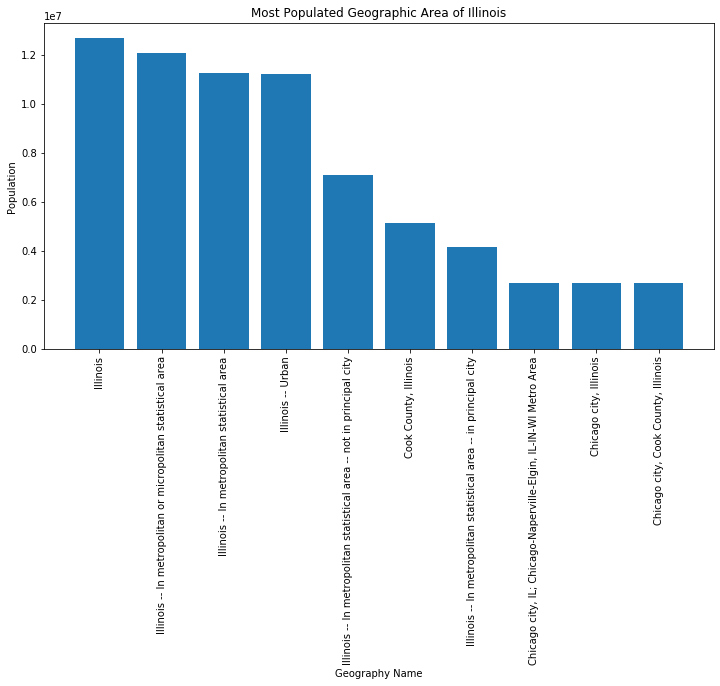

In [45]:
# Finding out the most populated geographic areas of Illinois
plt.figure(figsize=(12,6))
x = range(10)
plt.bar(x,new_df['SEX BY AGE% Total population%Total'])
plt.xticks(x,new_df['Geography Name'],rotation='vertical')
plt.xlabel("Geography Name")
plt.ylabel('Population')
plt.title("Most Populated Geographic Area of Illinois")
plt.show()

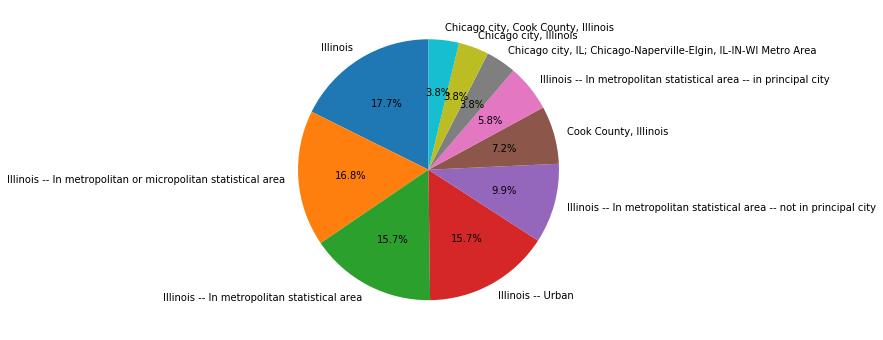

In [46]:
# Percentage districution of population
# Create a pie chart
plt.figure(figsize=(12,6))
plt.pie(
    # using data total)arrests
    new_df['SEX BY AGE% Total population%Total'],
    # with the labels being officer names
    labels=new_df['Geography Name'],
    # with no shadows
    shadow=False,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
plt.show()

In [47]:
new_df

LOGRECNO         Geography ID  \
0         1            04000US17   
1         4            040A0US17   
2         5            040C0US17   
3         2            04001US17   
4         7            040C2US17   
5        15         05000US17031   
6         6            040C1US17   
7       103  31200US169801714000   
8        86       16000US1714000   
9        39    06000US1703114000   

                                      Geography Name  \
0                                           Illinois   
1  Illinois -- In metropolitan or micropolitan st...   
2       Illinois -- In metropolitan statistical area   
3                                  Illinois -- Urban   
4  Illinois -- In metropolitan statistical area -...   
5                              Cook County, Illinois   
6  Illinois -- In metropolitan statistical area -...   
7  Chicago city, IL; Chicago-Naperville-Elgin, IL...   
8                             Chicago city, Illinois   
9                Chicago city, Cook County, Illinois   

   SEX BY AGE% Total population%Total  \
0                            12671821   
1                            12068319   
2                            11245600   
3                            11228181   
4                             7075841   
5                             5150233   
6                             4169759   
7                             2693959   
8                             2693959   
9                             2693959   

   SEX BY AGE%Total population%Total%Male%25 to 29 years  \
0                                             450372       
1                                             430294       
2                                             404780       
3                                             408796       
4                                             220963       
5                                             214834       
6                                             183817       
7                                             135735       
8                                             135735       
9                                             135735       

   SEX BY AGE%Total population%Total%Female%25 to 29 years  \
0                                             441242         
1                                             425150         
2                                             402128         
3                                             407192         
4                                             206735         
5                                             216633         
6                                             195393         
7                                             143136         
8                                             143136         
9                                             143136         

   RACE% Total population%Total  RACE%Total population%Total%White alone  \
0                    12671821.0                                9044059.0   
1                    12068319.0                                8474729.0   
2                    11245600.0                                7720673.0   
3                    11228181.0                                7662605.0   
4                     7075841.0                                5374965.0   
5                     5150233.0                                2916176.0   
6                     4169759.0                                2345708.0   
7                     2693959.0                                1369124.0   
8                     2693959.0                                1369124.0   
9                     2693959.0                                1369124.0   

   RACE%Total population%Total%Black or African American alone  \
0                                          1790212.0             
1                                          1772477.0             
2                                          1737128.0             
3                                          1766890.0             
4                         

In [48]:
new_df.drop(new_df.columns[18],axis = 1, inplace=False)

LOGRECNO         Geography ID  \
0         1            04000US17   
1         4            040A0US17   
2         5            040C0US17   
3         2            04001US17   
4         7            040C2US17   
5        15         05000US17031   
6         6            040C1US17   
7       103  31200US169801714000   
8        86       16000US1714000   
9        39    06000US1703114000   

                                      Geography Name  \
0                                           Illinois   
1  Illinois -- In metropolitan or micropolitan st...   
2       Illinois -- In metropolitan statistical area   
3                                  Illinois -- Urban   
4  Illinois -- In metropolitan statistical area -...   
5                              Cook County, Illinois   
6  Illinois -- In metropolitan statistical area -...   
7  Chicago city, IL; Chicago-Naperville-Elgin, IL...   
8                             Chicago city, Illinois   
9                Chicago city, Cook County, Illinois   

   SEX BY AGE% Total population%Total  \
0                            12671821   
1                            12068319   
2                            11245600   
3                            11228181   
4                             7075841   
5                             5150233   
6                             4169759   
7                             2693959   
8                             2693959   
9                             2693959   

   SEX BY AGE%Total population%Total%Male%25 to 29 years  \
0                                             450372       
1                                             430294       
2                                             404780       
3                                             408796       
4                                             220963       
5                                             214834       
6                                             183817       
7                                             135735       
8                                             135735       
9                                             135735       

   SEX BY AGE%Total population%Total%Female%25 to 29 years  \
0                                             441242         
1                                             425150         
2                                             402128         
3                                             407192         
4                                             206735         
5                                             216633         
6                                             195393         
7                                             143136         
8                                             143136         
9                                             143136         

   RACE% Total population%Total  RACE%Total population%Total%White alone  \
0                    12671821.0                                9044059.0   
1                    12068319.0                                8474729.0   
2                    11245600.0                                7720673.0   
3                    11228181.0                                7662605.0   
4                     7075841.0                                5374965.0   
5                     5150233.0                                2916176.0   
6                     4169759.0                                2345708.0   
7                     2693959.0                                1369124.0   
8                     2693959.0                                1369124.0   
9                     2693959.0                                1369124.0   

   RACE%Total population%Total%Black or African American alone  \
0                                          1790212.0             
1                                          1772477.0             
2                                          1737128.0             
3                                          1766890.0             
4                         

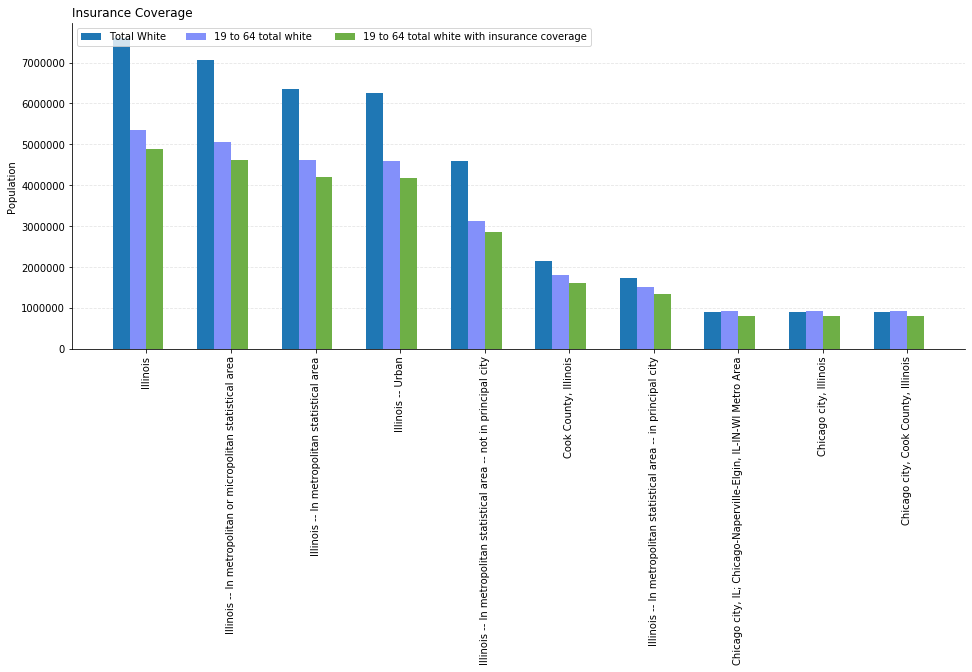

In [49]:
# Insurance Coverage
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(10)
# plot bars
plt.bar(x-0.3 , new_df['HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)% WHITE ALONE, NOT HISPANIC OR LATINO CIVILIAN NONINSTITUTIONALIZED POPULATION%Total'],width=0.2)
plt.bar(x-0.1, new_df['HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE)%WHITE ALONE CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%19 to 64 years'], width = 0.2, color = '#8390FA')
plt.bar(x+0.1, new_df['HEALTH INSURANCE COVERAGE STATUS BY AGE (WHITE ALONE)%WHITE ALONE CIVILIAN NONINSTITUTIONALIZED POPULATION%Total%19 to 64 years%With health insurance coverage'], width = 0.2, color = '#6EAF46')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Population')
plt.xticks(x, new_df['Geography Name'],rotation='vertical')
# plt.xlim(-0.5, 31)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Insurance Coverage', loc ='left')
plt.legend(['Total White', '19 to 64 total white ', '19 to 64 total white with insurance coverage'], loc='upper left', ncol = 3)
plt.show()

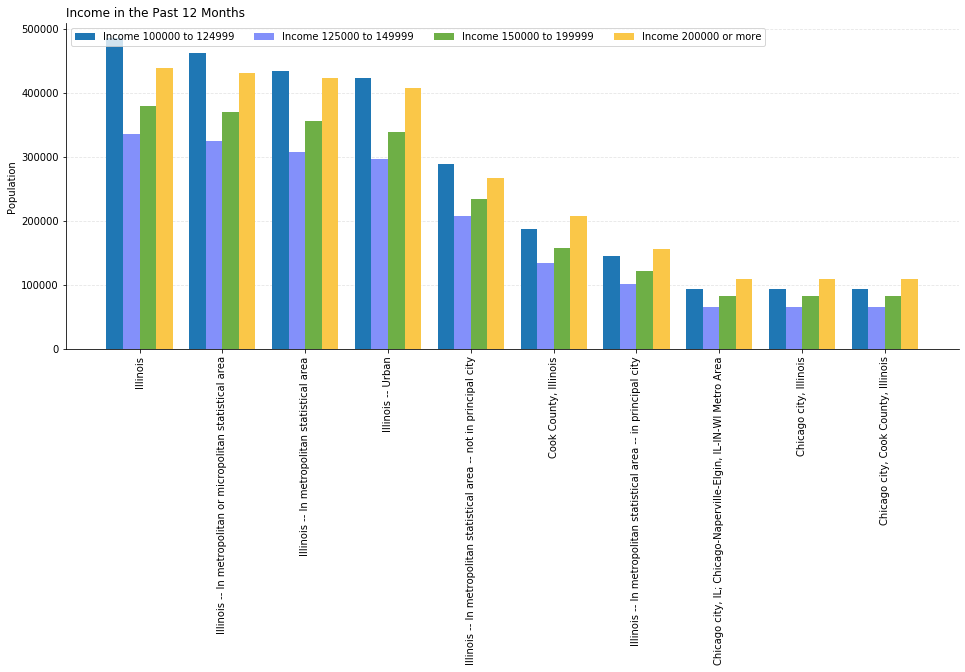

In [50]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(10)
# plot bars
plt.bar(x-0.3 , new_df['HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$100 000 to $124 999'],width = 0.2)
plt.bar(x-0.1, new_df['HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$125 000 to $149 999'], width = 0.2, color = '#8390FA')
plt.bar(x+0.1, new_df['HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$150 000 to $199 999'], width = 0.2, color = '#6EAF46')
plt.bar(x+0.3, new_df['HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)%Households%Total%$200 000 or more'], width = 0.2, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Population')
plt.xticks(x, new_df['Geography Name'],rotation='vertical')
# plt.xlim(-0.5, 31)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Income in the Past 12 Months', loc ='left')
plt.legend(['Income 100000 to 124999', 'Income 125000 to 149999', 'Income 150000 to 199999','Income 200000 or more'], loc='upper left', ncol = 4)
plt.show()